# Neural Network
Thông tin thành viên(Họ tên - MSSV):
- Thành viên 1: Võ Trung Tín - 22127417
- Thành viên 2: 

## Kiểm tra môi trường code

In [4]:
import sys
sys.executable

'c:\\Users\\tin75\\anaconda3\\envs\\ml-env\\python.exe'

## Import các thư viện cần thiết

In [5]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

## Đọc và kiểm tra tập dữ liệu import từ thư viện

In [6]:
np.random.seed(0) # tạo ra số giả ngẫu nhiên dựa trên giá trị seed 
(train_X, train_y),(test_X, test_y)=cifar10.load_data() # tải tập dữ liệu lên và lưu vào 4 mảng train_X, train_y và test_X, test_y
print('Số ảnh dùng để train:',len(train_X))
print('Số ảnh dùng để test :',len(test_X))
print('Kích cỡ ảnh train :',train_X.shape)
print('Kích cỡ train_label :',train_y.shape)
print('Kích cỡ ảnh test :',test_X.shape)
print('Kích cỡ test_label :',test_y.shape)

print('Ma trận pixel của một bức tranh:\n', train_X[0])

170498071/170498071 [==============================] - 297s 2us/step
Số ảnh dùng để train: 50000
Số ảnh dùng để test : 10000
Kích cỡ ảnh train : (50000, 32, 32, 3)
Kích cỡ train_label : (50000, 1)
Kích cỡ ảnh test : (10000, 32, 32, 3)
Kích cỡ test_label : (10000, 1)
Ma trận pixel của một bức tranh:
 [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


Nhìn vào các pixel của bức tranh ta thấy đây là một ma trận 3 chiều

## Khám phá dữ liệu huấn luyện

Ta hãy thử xem mặt mũi của vài ảnh trong `train_X` với label trong `train_y`

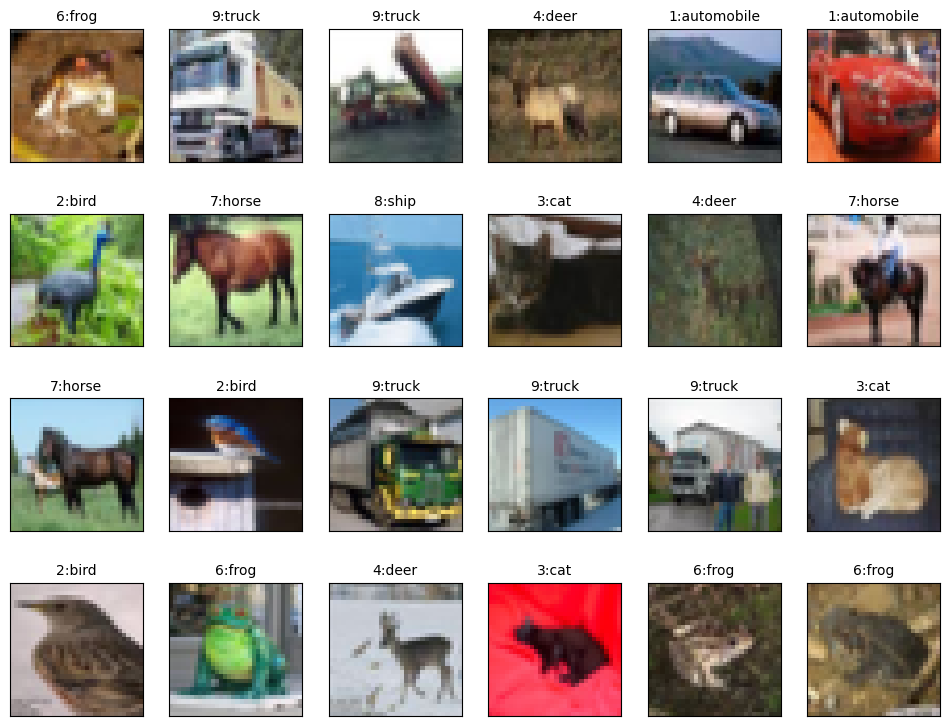

In [7]:
label_dict={0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer",
            5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}
# Tạo một từ điển và gán các giá trị từ 0 đến 9 cho các loại ảnh tương ứng với 10 classes

def showImageandLabel(images, labels,  idx, num=10):
    fig = plt.gcf() # lấy số liệu của 1 hình ảnh và gán cho fig
    
    fig.set_size_inches(12, 14) # kiểm soát kích thước hình ảnh
    
    if num>25: num=25  #Hiển thị lên đến 25
    
    for i in range(0, num):
        ax=plt.subplot(6,6, 1+i)
        ax.imshow(images[idx],cmap='binary') # hiển thị dữ liệu dưới dạng hình ảnh, cmap để ánh xạ dữ liệu vô hướng với màu sắc và ở đây là loại binary
        title=str(labels[i][0])+':'+label_dict[labels[i][0]]# Danh mục tương ứng với hình thứ i
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]); # để đặt các vị trí xtick trên trục x nhưng bên trong là chuỗi rỗng nên các giá trị tick sẽ không nhìn thấy
        ax.set_yticks([])  # để đặt các vị trí ytick trên trục y nhưng bên trong là chuỗi rỗng nên các giá trị tick sẽ không nhìn thấy      
        idx+=1 
    
    plt.show()

showImageandLabel(train_X, train_y, 0, 24) #In 12 ảnh

Tiếp theo, ta hãy xem các giá trị có thể có của `train_y` và số lượng của mỗi giá trị này.

In [8]:
values, counts = np.unique(train_y, return_counts=True)
for value, count in zip(values, counts):
    print(f'Value: {value}, count: {count}')

Value: 0, count: 5000
Value: 1, count: 5000
Value: 2, count: 5000
Value: 3, count: 5000
Value: 4, count: 5000
Value: 5, count: 5000
Value: 6, count: 5000
Value: 7, count: 5000
Value: 8, count: 5000
Value: 9, count: 5000


Như vậy là `train_y` có 10 giá trị có thể có ứng với 10 chữ số từ 0 đến 9 (là 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck)). Và số lượng ảnh tương ứng mỗi chữ số bằng nhau.

## Tiền xử lý dữ liệu huấn luyện

(1) Normalize the image data

In [9]:
# Chuẩn hóa pixel từ [0.0 , 255.0] về [0.0, 1.0]
x_train_normalize = train_X.astype('float32') / 255.0  
x_test_normalize = test_X.astype('float32') / 255.0

#Kiểm tra sau khi chuẩn hóa
print(train_X[0][0][0]) # Ban đầu
print(x_train_normalize[0][0][0]) # Đã chuẩn hóa 

[59 62 63]
[0.23137255 0.24313726 0.24705882]


(2) Flatten the image data

In [10]:
# Làm phẳng dữ liệu từ (32, 32, 3) -> (3072,)
x_train = x_train_normalize.reshape(-1, 3072)
x_test = x_test_normalize.reshape(-1, 3072)

# Làm phẳng labels thành vector 1 chiều
y_train_Flatten = train_y.reshape(-1)
y_test_Flatten = test_y.reshape(-1)

#Kiểm tra sau khi làm phẳng dữ liệu
print(x_train[0])    # In toàn bộ vector của hình ảnh đầu tiên
print(y_train_Flatten)       # In toàn bộ labels 

[0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295]
[6 9 9 ... 9 1 1]


(3) Apply one-hot encoding to the output labels

In [11]:
# Chuyển labels thành one-hot vector
y_train = np.eye(10)[y_train_Flatten]
y_test = np.eye(10)[y_test_Flatten]

# Kiểm tra sau khi chuyển labels thành one-hot vector
print(y_train.shape)
print(y_train[:5])


(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Dữ liệu huấn luyện sau khi xử lý lưu trong 4 mảng:
- `x_train`, `x_test`
- `y_train`, `y_test`

## Tìm mô hình Neural Network từ dữ liệu huấn luyện